In [53]:
%%capture deps
!pip install pandas
!pip install sklearn
!pip install xlrd

In [29]:
import pandas as pd

In [7]:
data = pd.DataFrame( ['apple', 'banana', 'apple', 'apple', 'cherry', 'cherry', 'dates', 'apple', 'dates'], columns=['fruit'])

In [8]:
data.head()

fruit
0   apple
1  banana
2   apple
3   apple
4  cherry

## Label and One-Hot-Encode with Pandas

In [30]:
data_pd = data.copy()

In [31]:
data_pd['fruit'] = data_pd['fruit'].astype('category')


In [32]:
data_pd['fruit'].cat.codes

0    0
1    1
2    0
3    0
4    2
5    2
6    3
7    0
8    3
dtype: int8

In [33]:
data_pd['fruit'].cat.categories

Index(['apple', 'banana', 'cherry', 'dates'], dtype='object')

In [34]:
data_pd = data_pd.assign( fruit_label_encoded = data_pd.fruit.cat.codes)
data_pd.head()

fruit  fruit_label_encoded
0   apple                    0
1  banana                    1
2   apple                    0
3   apple                    0
4  cherry                    2

In [35]:
pd.get_dummies(data_pd.fruit, prefix="fruit")

fruit_apple  fruit_banana  fruit_cherry  fruit_dates
0            1             0             0            0
1            0             1             0            0
2            1             0             0            0
3            1             0             0            0
4            0             0             1            0
5            0             0             1            0
6            0             0             0            1
7            1             0             0            0
8            0             0             0            1

In [36]:
data_pd = data_pd.join(pd.get_dummies(data_pd.fruit, prefix="fruit"))
data_pd.head()

fruit  fruit_label_encoded  fruit_apple  fruit_banana  fruit_cherry  \
0   apple                    0            1             0             0   
1  banana                    1            0             1             0   
2   apple                    0            1             0             0   
3   apple                    0            1             0             0   
4  cherry                    2            0             0             1   

   fruit_dates  
0            0  
1            0  
2            0  
3            0  
4            0

## Label and One-Hot-Encode with Sklearn

In [37]:
data_sk = data.copy()

In [38]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [39]:
label_enc = LabelEncoder()
one_hot_enc = OneHotEncoder()

In [40]:
label_enc.fit_transform(data_sk.fruit)

le = label_enc.fit(data_sk.fruit)

In [41]:
le.classes_

array(['apple', 'banana', 'cherry', 'dates'], dtype=object)

In [42]:
data_sk = data_sk.assign( fruit_label_encoded  = label_enc.fit_transform(data_sk.fruit))

In [43]:
data_sk.head()

fruit  fruit_label_encoded
0   apple                    0
1  banana                    1
2   apple                    0
3   apple                    0
4  cherry                    2

In [44]:
one_hot_enc.fit_transform(data_sk.fruit_label_encoded.values.reshape(-1,1)).todense()

matrix([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.]])

In [45]:
encoded_numpy = one_hot_enc.fit_transform(data_sk.fruit_label_encoded.values.reshape(-1,1)).todense()

In [46]:
pd.DataFrame(encoded_numpy.astype(int), columns=le.classes_)

apple  banana  cherry  dates
0      1       0       0      0
1      0       1       0      0
2      1       0       0      0
3      1       0       0      0
4      0       0       1      0
5      0       0       1      0
6      0       0       0      1
7      1       0       0      0
8      0       0       0      1

In [47]:
data_sk.join(pd.DataFrame(encoded_numpy.astype(int), columns=le.classes_))

fruit  fruit_label_encoded  apple  banana  cherry  dates
0   apple                    0      1       0       0      0
1  banana                    1      0       1       0      0
2   apple                    0      1       0       0      0
3   apple                    0      1       0       0      0
4  cherry                    2      0       0       1      0
5  cherry                    2      0       0       1      0
6   dates                    3      0       0       0      1
7   apple                    0      1       0       0      0
8   dates                    3      0       0       0      1

## Plot

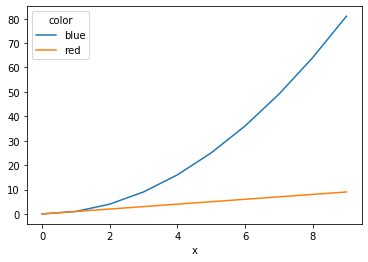

In [48]:
df = pd.DataFrame([
    ['red', 0, 0],
    ['red', 1, 1],
    ['red', 2, 2],
    ['red', 3, 3],
    ['red', 4, 4],
    ['red', 5, 5],
    ['red', 6, 6],
    ['red', 7, 7],
    ['red', 8, 8],
    ['red', 9, 9],
    ['blue', 0, 0],
    ['blue', 1, 1],
    ['blue', 2, 4],
    ['blue', 3, 9],
    ['blue', 4, 16],
    ['blue', 5, 25],
    ['blue', 6, 36],
    ['blue', 7, 49],
    ['blue', 8, 64],
    ['blue', 9, 81],
], columns=['color', 'x', 'y'])

df = df.pivot(index='x', columns='color', values='y')

df.plot()

## Plot Examples from Damiaan Zwietering

source: https://gitlab.com/dzwietering/corona/-/blob/master/EUCDC.ipynb

In [62]:
!curl -O https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3341k  100 3341k    0     0  2574k      0  0:00:01  0:00:01 --:--:-- 2576k


In [63]:
import pandas as pd
import numpy  as np

#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

%matplotlib inline

In [64]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-12-01    1     12  2020    272      11             Afghanistan    AF   
1 2020-11-30   30     11  2020      0       0             Afghanistan    AF   
2 2020-11-29   29     11  2020    228      11             Afghanistan    AF   
3 2020-11-28   28     11  2020    214      15             Afghanistan    AF   
4 2020-11-27   27     11  2020      0       0             Afghanistan    AF   
5 2020-11-26   26     11  2020    200      12             Afghanistan    AF   
6 2020-11-25   25     11  2020    185      13             Afghanistan    AF   
7 2020-11-24   24     11  2020    246      17             Afghanistan    AF   
8 2020-11-23   23     11  2020    252       8             Afghanistan    AF   
9 2020-11-22   22     11  2020    154      12             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  \
0                  AFG   38041757.0         Asia   
1                  AFG   38041757.0         Asia   
2                  AFG   38041757.0         Asia   
3                  AFG   38041757.0         Asia   
4                  AFG   38041757.0         Asia   
5                  AFG   38041757.0         Asia   
6                  AFG   38041757.0         Asia   
7                  AFG   38041757.0         Asia   
8                  AFG   38041757.0         Asia   
9                  AFG   38041757.0         Asia   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                           6.960772           
1                                           6.416633           
2                                           6.845110           
3                                           6.784650           
4                                           6.395604           
5                                           7.341932           
6                                           7.199983           
7                                           6.713675           
8                                           6.655844           
9                                           6.203709

In [65]:
df_geo = df.dropna(subset=['geoId']).pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo.head(10)

cases                                          ... deaths           \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VG  VI   VN   
dateRep                                                   ...                   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-05   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-06   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-07   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-08   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-09   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   

                                        
geoId       VU  WF  XK  YE  ZA  ZM  ZW  
dateRep                                 
2019-12-31 NaN NaN NaN NaN NaN NaN NaN  
2020-01-01 NaN NaN NaN NaN NaN NaN NaN  
2020-01-02 NaN NaN NaN NaN NaN NaN NaN  
2020-01-03 NaN NaN NaN NaN NaN NaN NaN  
2020-01-04 NaN NaN NaN NaN NaN NaN NaN  
2020-01-05 NaN NaN NaN NaN NaN NaN NaN  
2020-01-06 NaN NaN NaN NaN NaN NaN NaN  
2020-01-07 NaN NaN NaN NaN NaN NaN NaN  
2020-01-08 NaN NaN NaN NaN NaN NaN NaN  
2020-01-09 NaN NaN NaN NaN NaN NaN NaN  

[10 rows x 428 columns]

In [66]:
df_geo.describe().transpose()

count        mean         std   min   25%    50%    75%     max
       geoId                                                                 
cases  AD     263.0   25.646388   50.541953   0.0   0.0    1.0   26.5   299.0
       AE     331.0  510.151057  438.694186   0.0  51.5  435.0  810.5  1578.0
       AF     327.0  141.027523  207.018439   0.0   0.0   58.0  185.5  1063.0
       AG     257.0    0.548638    2.646963   0.0   0.0    0.0    0.0    39.0
       AI     250.0    0.024000    0.198953   0.0   0.0    0.0    0.0     2.0
...             ...         ...         ...   ...   ...    ...    ...     ...
deaths XK     263.0    3.863118    5.246254 -12.0   0.0    2.0    7.0    40.0
       YE     236.0    2.622881    5.534202   0.0   0.0    1.0    3.0    52.0
       ZA     269.0   80.055762   83.578906   0.0  12.0   60.0  115.0   572.0
       ZM     258.0    1.383721    4.323950   0.0   0.0    0.0    1.0    40.0
       ZW     256.0    1.082031    2.550876   0.0   0.0    0.0    1.0    18.0

[428 rows x 8 columns]

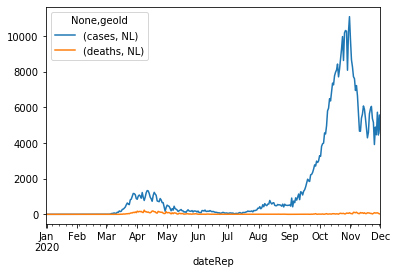

In [67]:
df_geo[[('cases', 'NL'), ('deaths', 'NL')]].plot()

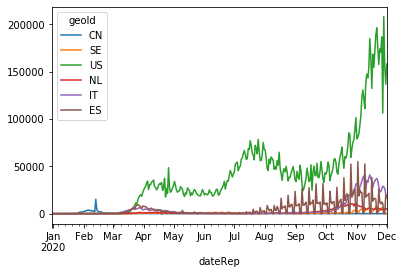

In [68]:
 df_geo['cases'][['CN', 'SE', 'US', 'NL', 'IT', 'ES']].plot()

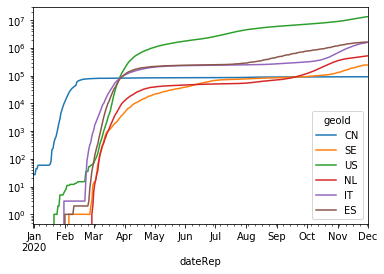

In [69]:
df_geo['cases'][['CN', 'SE', 'US', 'NL', 'IT', 'ES']].cumsum().plot(logy=True)

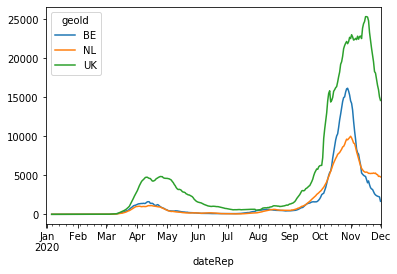

In [70]:
 df_geo['cases'][['BE', 'NL', 'UK']].rolling(7).mean().plot()